In [1]:
import numpy as np
import pandas as pd
import pandas.io.sql as sqlio
import psycopg2 as ps

In [2]:
conn = ps.connect(dbname="kodlasam final proje",
                  user="postgres",
                  password="123456",
                  port = "5432")

In [ ]:
## şirketimizin satın alma birimi bizden ürünlerin ve ürün kategorilerinin fiyatları ve satış miktarları ile ilgili analizler yapmamızı istedi.

## Ürün-Fiyat analizi
## Soru 1: Ürünlerin fiyat dağılımı nasıl? En yüksek fiyatlı ürünler hangi kategorilerde?

In [5]:
sql = '''
    SELECT
        p.product_name,
        p.unit_price,
        c.category_name
    FROM
        products p
    JOIN
        categories c ON p.category_id = c.category_id
    ORDER BY
        p.unit_price DESC;
'''

In [6]:
df = sqlio.read_sql_query(sql,conn)
df.head()

C:\Users\95onu\AppData\Local\Temp\ipykernel_16356\1600180838.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = sqlio.read_sql_query(sql,conn)


,product_name,unit_price,category_name
0,Côte de Blaye,263.50,Beverages
1,Thüringer Rostbratwurst,123.79,Meat/Poultry
2,Mishi Kobe Niku,97.00,Meat/Poultry
3,Sir Rodney's Marmalade,81.00,Confections
4,Carnarvon Tigers,62.50,Seafood


In [8]:
df.shape

(77, 3)

## Görselleştirme

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

## Ürünler ve kategorilerin fiyat dağılımını gösteren tablo

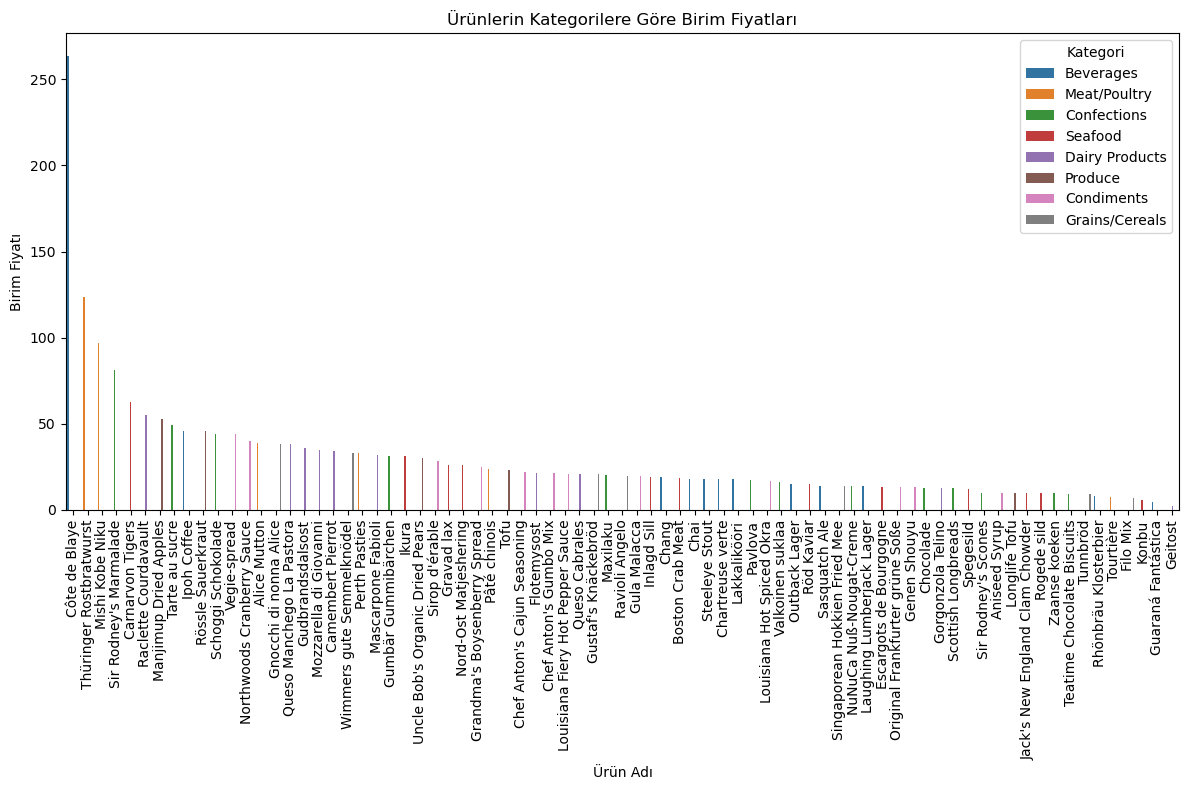

In [10]:
plt.figure(figsize=(12, 8))
sns.barplot(data=df, x='product_name', y='unit_price', hue='category_name')
plt.xticks(rotation=90)  # Ürün isimlerini döndür
plt.title('Ürünlerin Kategorilere Göre Birim Fiyatları')
plt.xlabel('Ürün Adı')
plt.ylabel('Birim Fiyatı')
plt.legend(title='Kategori')
plt.tight_layout()
plt.show()

## Soru 2 :En yüksek fiyatlı ürüne sahip olan ilk 5 kategori hangileridir?

In [17]:
import pandas as pd
import psycopg2 as ps

In [18]:
conn = ps.connect(dbname="kodlasam final proje",
                  user="postgres",
                  password="123456",
                  port = "5432")

In [19]:
sql = '''
    SELECT
        c.category_name,
        MAX(p.unit_price) AS max_price
    FROM
        products p
    JOIN
        categories c ON p.category_id = c.category_id
    GROUP BY
        c.category_name
    ORDER BY
        max_price DESC
    LIMIT 5;
'''

In [21]:
df = pd.read_sql_query(sql, conn)
conn.close()

C:\Users\95onu\AppData\Local\Temp\ipykernel_16356\2694432925.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql, conn)


In [22]:
print(df)

    category_name  max_price
0       Beverages     263.50
1    Meat/Poultry     123.79
2     Confections      81.00
3         Seafood      62.50
4  Dairy Products      55.00


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

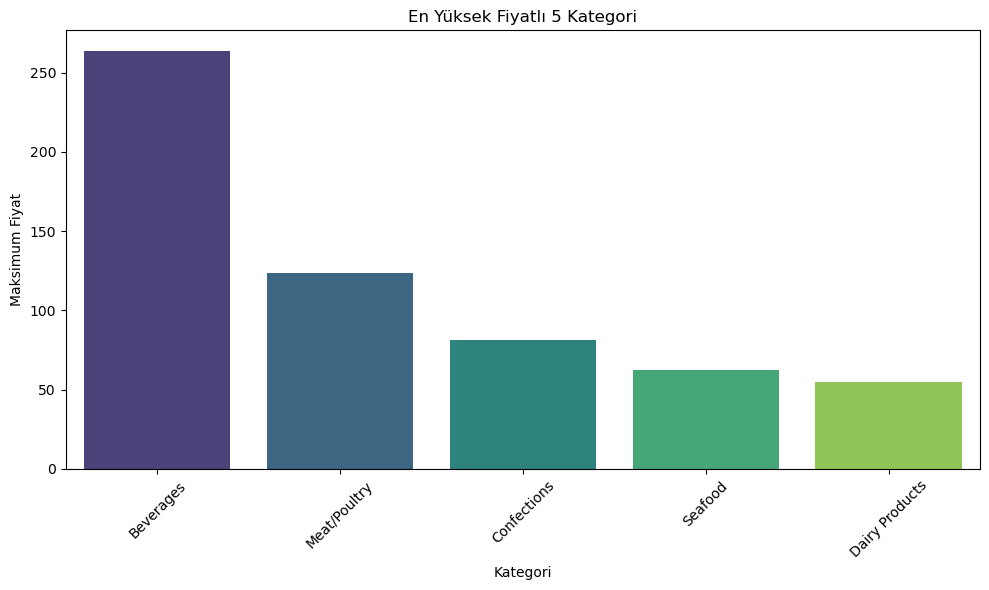

In [24]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='category_name', y='max_price', palette='viridis')
plt.title('En Yüksek Fiyatlı 5 Kategori')
plt.xlabel('Kategori')
plt.ylabel('Maksimum Fiyat')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Soru 3 : En çok satın alınan ürünler ve kategorileri hangileridir?

In [25]:
import pandas as pd
import pandas.io.sql as sqlio
import psycopg2 as ps

In [26]:
conn = ps.connect(
    dbname="kodlasam final proje",
    user="postgres",
    password="123456",
    port="5432"
)

In [27]:
query = """
SELECT
    p.product_name,
    SUM(od.quantity) AS total_quantity,
    c.category_name
FROM
    order_details od
JOIN
    products p ON od.product_id = p.product_id
JOIN
    categories c ON p.category_id = c.category_id
GROUP BY
    p.product_name, c.category_name
ORDER BY
    total_quantity DESC
LIMIT 10;
"""

In [28]:
df = sqlio.read_sql_query(query, conn)

C:\Users\95onu\AppData\Local\Temp\ipykernel_16356\2233066866.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = sqlio.read_sql_query(query, conn)


In [29]:
conn.close()

In [30]:
print(df.head())

             product_name  total_quantity   category_name
0       Camembert Pierrot            1577  Dairy Products
1    Raclette Courdavault            1496  Dairy Products
2       Gorgonzola Telino            1397  Dairy Products
3  Gnocchi di nonna Alice            1263  Grains/Cereals
4                 Pavlova            1158     Confections


In [31]:
import matplotlib.pyplot as plt

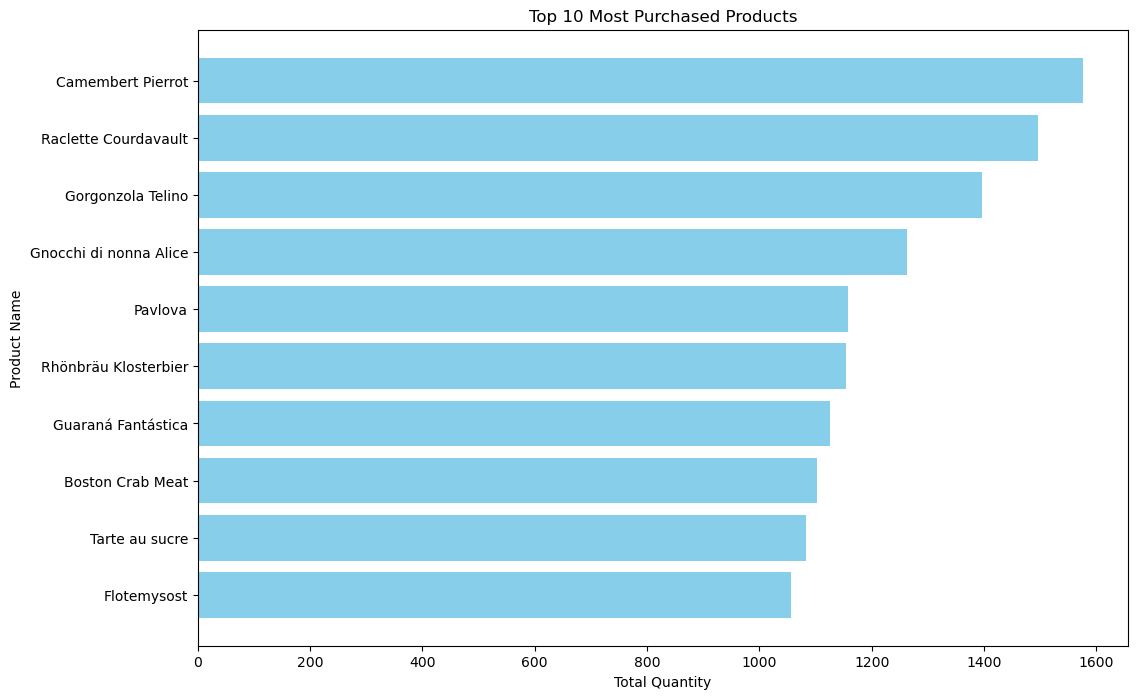

In [32]:
plt.figure(figsize=(12, 8))
plt.barh(df['product_name'], df['total_quantity'], color='skyblue')
plt.xlabel('Total Quantity')
plt.ylabel('Product Name')
plt.title('Top 10 Most Purchased Products')
plt.gca().invert_yaxis()
plt.show()

In [1]:
## satın alma birimi tedarikçiler ve sundukları ürünler hakkında analizler istedi.

## TEDARİKÇİ ANALİZİ
## Soru 1:En yüksek fiyata sahip ürünler hangi tedarikçilerden geliyor?

In [1]:
import pandas as pd
import psycopg2 as ps

In [2]:
conn = ps.connect(
    dbname="kodlasam final proje",
    user="postgres",
    password="123456",
    port="5432"
)

In [3]:
sql = '''
    SELECT
        s.company_name AS supplier,
        MAX(p.unit_price) AS max_price
    FROM
        products p
    JOIN
        suppliers s ON p.supplier_id = s.supplier_id
    GROUP BY
        s.company_name
    ORDER BY
        max_price DESC
    LIMIT 5;
'''


In [4]:
df = pd.read_sql_query(sql, conn)

C:\Users\95onu\AppData\Local\Temp\ipykernel_13580\519230448.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql, conn)


In [5]:
print(df)

                            supplier  max_price
0         Aux joyeux ecclésiastiques     263.50
1  Plutzer Lebensmittelgroßmärkte AG     123.79
2                      Tokyo Traders      97.00
3           Specialty Biscuits, Ltd.      81.00
4                      Pavlova, Ltd.      62.50


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

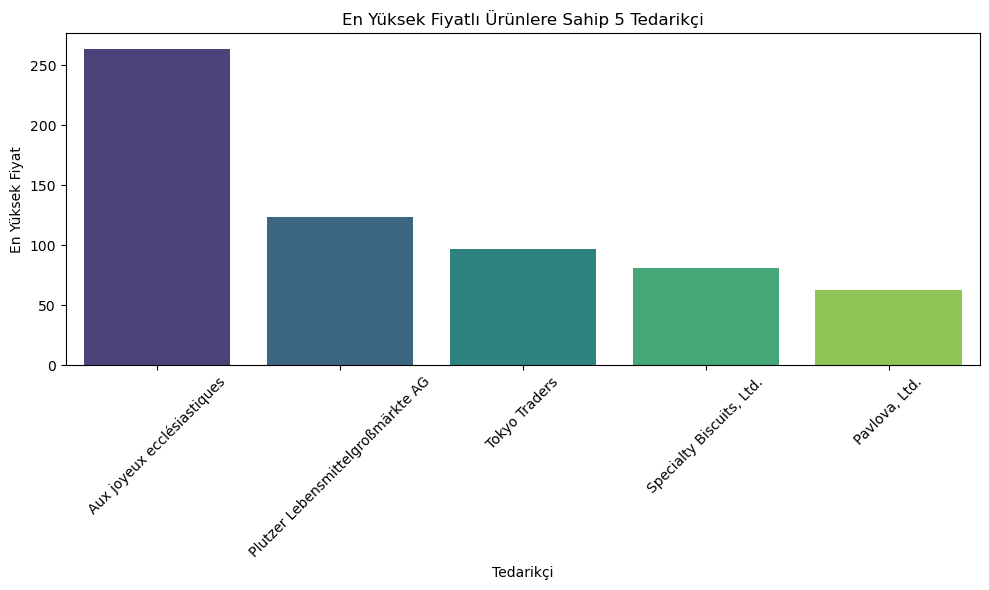

In [7]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='supplier', y='max_price', palette='viridis')
plt.title('En Yüksek Fiyatlı Ürünlere Sahip 5 Tedarikçi')
plt.xlabel('Tedarikçi')
plt.ylabel('En Yüksek Fiyat')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Soru 2: En Çok Alışveriş Yapılan 5 Tedarikçi Hangileridir?

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import psycopg2 as ps

In [16]:
conn = ps.connect(
    dbname="kodlasam final proje",
    user="postgres",
    password="123456",
    port="5432"
)

In [17]:
query = """
SELECT
    s.company_name AS supplier,
    SUM(od.quantity) AS total_orders
FROM
    order_details od
JOIN
    products p ON od.product_id = p.product_id
JOIN
    suppliers s ON p.supplier_id = s.supplier_id
GROUP BY
    s.company_name
ORDER BY
    total_orders DESC
LIMIT 5;
"""

In [18]:
df = pd.read_sql_query(query, conn)
conn.close()

C:\Users\95onu\AppData\Local\Temp\ipykernel_13580\711990737.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


In [19]:
print(df)

                            supplier  total_orders
0  Plutzer Lebensmittelgroßmärkte AG          4072
1                      Pavlova, Ltd.          3937
2           Specialty Biscuits, Ltd.          3679
3                       Gai pâturage          3073
4                    Norske Meierier          2526


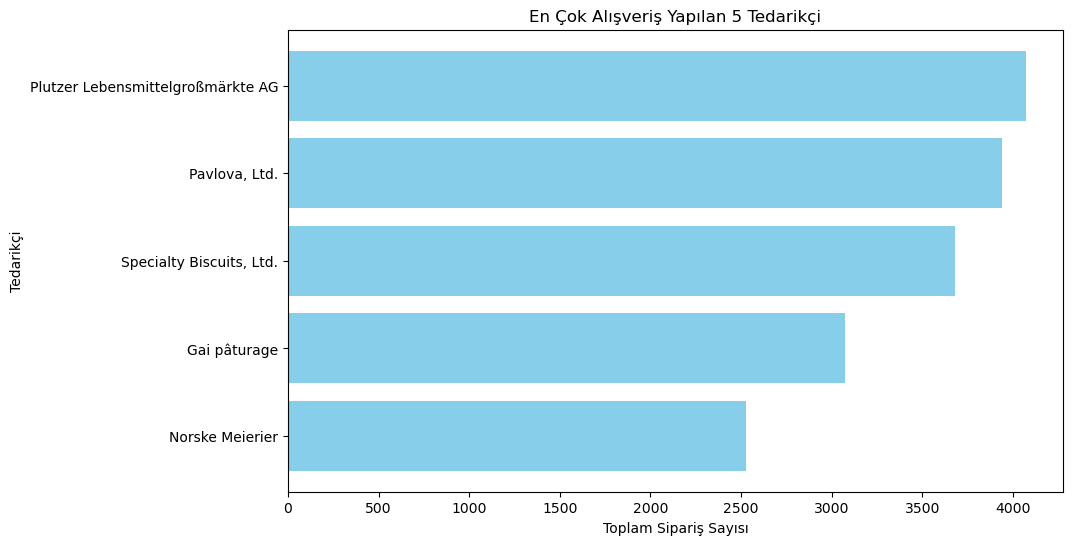

In [20]:
plt.figure(figsize=(10, 6))
plt.barh(df['supplier'], df['total_orders'], color='skyblue')
plt.xlabel('Toplam Sipariş Sayısı')
plt.ylabel('Tedarikçi')
plt.title('En Çok Alışveriş Yapılan 5 Tedarikçi')
plt.gca().invert_yaxis()  # En büyükten küçüğe sıralama için
plt.show()

In [3]:
## burda dikkatimi çeken durum en pahalı ürünlere sahip olan 2. tedarikçimiz ile en fazla alışverişi yapıyoruz belki bu tedarikçiden iskonto 
## isteyebilirz ya da bize aynı ürünleri daha ucuza verebilecek tedarikçileri araştırabiliriz.

In [4]:
##pazarlama ve satış departmanımız bizden müşteri analizi yapmamızı istedi.

## MÜŞTERİ-SİPARİŞ ANALİZİ
## Soru 1: Hangi müşteriler daha fazla sipariş veriyor?

In [40]:
import matplotlib.pyplot as plt
import pandas as pd
import psycopg2 as ps

In [41]:
conn = ps.connect(dbname="kodlasam final proje",
                  user="postgres",
                  password="123456",
                  port="5432")

In [42]:
query = """
SELECT
    c.customer_id,
    c.company_name,
    COUNT(o.order_id) AS total_orders
FROM
    customers c
JOIN
    orders o ON c.customer_id = o.customer_id
GROUP BY
    c.customer_id, c.company_name
ORDER BY
    total_orders DESC
LIMIT 10;
"""

In [43]:
df = pd.read_sql_query(query, conn)

C:\Users\95onu\AppData\Local\Temp\ipykernel_13580\1553155693.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


In [44]:
conn.close()

In [51]:
print(df)

  customer_id                  company_name  total_orders
0       SAVEA            Save-a-lot Markets            31
1       ERNSH                  Ernst Handel            30
2       QUICK                    QUICK-Stop            28
3       FOLKO                Folk och fä HB            19
4       HUNGO  Hungry Owl All-Night Grocers            19
5       RATTC    Rattlesnake Canyon Grocery            18
6       BERGS            Berglunds snabbköp            18
7       HILAA              HILARION-Abastos            18
8       BONAP                      Bon app'            17
9       FRANK                Frankenversand            15


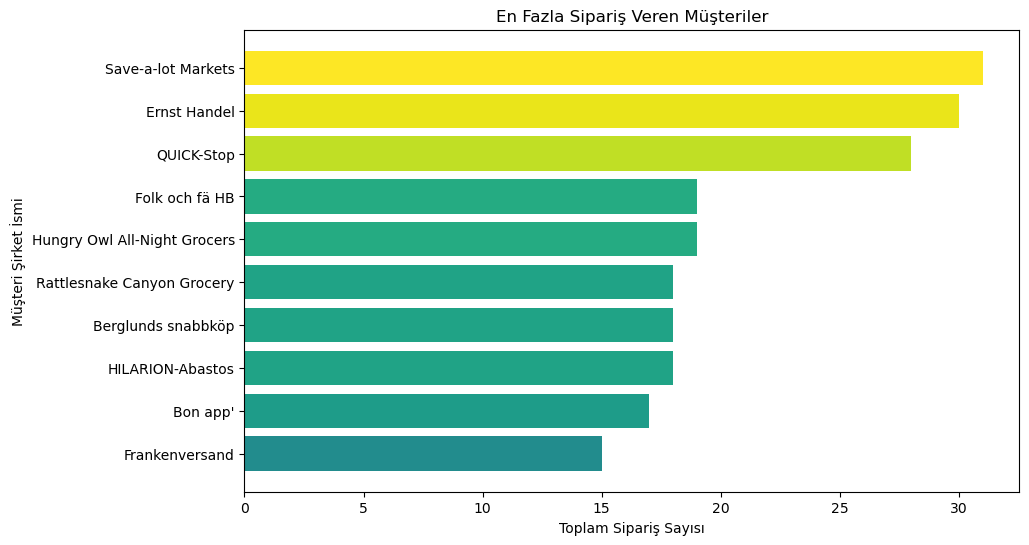

In [50]:
plt.figure(figsize=(10, 6))
plt.barh(df['company_name'], df['total_orders'], color=plt.cm.viridis(df['total_orders'] / max(df['total_orders'])))
plt.xlabel('Toplam Sipariş Sayısı')
plt.ylabel('Müşteri Şirket İsmi')
plt.title('En Fazla Sipariş Veren Müşteriler')
plt.gca().invert_yaxis()
plt.show()

## Soru 2: Siparişlerde en çok harcama yapan ilk 10 müşteri hangileri?

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import psycopg2 as ps

In [67]:
conn = ps.connect(dbname="kodlasam final proje",
                  user="postgres",
                  password="123456",
                  port="5432")

In [68]:
query = """
SELECT
    c.company_name AS customer,
    SUM(od.unit_price * od.quantity) AS total_spending
FROM
    order_details od
JOIN
    orders o ON od.order_id = o.order_id
JOIN
    customers c ON o.customer_id = c.customer_id
GROUP BY
    c.company_name
ORDER BY
    total_spending DESC
LIMIT 10;  -- Sadece en çok harcayan 10 müşteri
"""

In [69]:
df = pd.read_sql_query(query, conn)

C:\Users\95onu\AppData\Local\Temp\ipykernel_13580\1553155693.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


In [70]:
conn.close()

In [75]:
print(df)

                       customer  total_spending
0                    QUICK-Stop   117483.390148
1            Save-a-lot Markets   115673.389643
2                  Ernst Handel   113236.679782
3  Hungry Owl All-Night Grocers    57317.390162
4    Rattlesnake Canyon Grocery    52245.900347
5                 Hanari Carnes    34101.149974
6                Folk och fä HB    32555.550019
7                Mère Paillarde    32203.900234
8               Königlich Essen    31745.749893
9                 Queen Cozinha    30226.100180


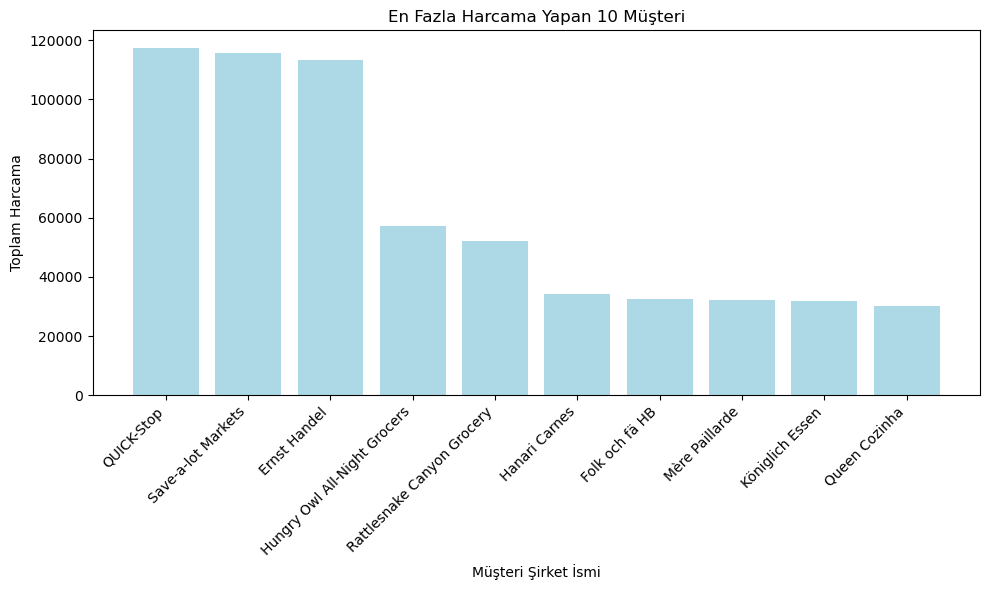

In [74]:
plt.figure(figsize=(10, 6))
plt.bar(df['customer'], df['total_spending'], color='lightblue')
plt.xlabel('Müşteri Şirket İsmi')
plt.ylabel('Toplam Harcama')
plt.title('En Fazla Harcama Yapan 10 Müşteri')
plt.xticks(rotation=45, ha='right')  # Müşteri isimlerini döndür
plt.tight_layout()  # Düzeni sıkıştır
plt.show()

In [5]:
## burda dikkatimi çeken durum şu oldu; en fazla harcaman yapan 7 8 ve9. şirketler en fazla alışveriş yapan şirketler tablomuzda görünmüyor.
## bu şirketlere daha fazla alışveriş yapmaları için çeşitli kampanya ve promosyonlar sunulabilir bu sayede hem bağlılıkları hem de getirileri
## fazla olur.

In [6]:
## insan kaynakları departmanı bizden çalışanlar hakkında bir perofrmans analizi istedi.

## Çalışan performans analizi
## Soru 1: Çalışanların toplam satış miktarı nedir?

In [121]:
import matplotlib.pyplot as plt
import pandas as pd
import pandas.io.sql as sqlio
import psycopg2 as ps

In [122]:
conn = ps.connect(dbname="kodlasam final proje",
                  user="postgres",
                  password="123456",
                  port="5432")

In [123]:
sql = """
SELECT
    e.first_name || ' ' || e.last_name AS employee_name,
    COUNT(o.order_id) AS total_orders,
    ROUND(SUM(od.unit_price * od.quantity)::NUMERIC, 2) AS total_sales,
    ROUND(SUM(od.unit_price * od.quantity)::NUMERIC / NULLIF(COUNT(o.order_id), 0)::NUMERIC, 2) AS sales_per_order
FROM
    orders o
JOIN
    order_details od ON o.order_id = od.order_id
JOIN
    employees e ON o.employee_id = e.employee_id
GROUP BY
    e.employee_id, e.first_name, e.last_name
ORDER BY
	total_sales DESC;
"""

In [124]:
df = sqlio.read_sql_query(sql, conn)
conn.close()

C:\Users\95onu\AppData\Local\Temp\ipykernel_13580\2304205925.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = sqlio.read_sql_query(sql, conn)


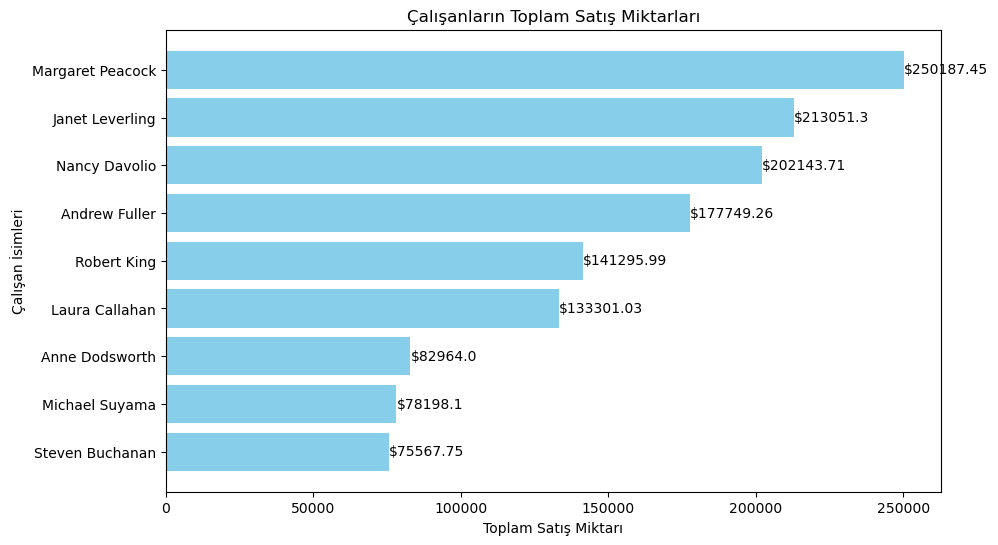

In [125]:
plt.figure(figsize=(10, 6))
plt.barh(df['employee_name'], df['total_sales'], color='skyblue')
plt.xlabel('Toplam Satış Miktarı')
plt.ylabel('Çalışan İsimleri')
plt.title('Çalışanların Toplam Satış Miktarları')
plt.gca().invert_yaxis() 
for index, value in enumerate(df['total_sales']):
    plt.text(value, index, f'${value}', va='center')

plt.show()

## Soru 2: Çalışanlar toplam kaç farklı müşteri ile iglienmişlerdir?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import psycopg2

In [2]:
conn = psycopg2.connect(
    dbname="kodlasam final proje",
    user="postgres",
    password="123456",
    host="localhost",
    port="5432"
)

In [3]:
query = """
SELECT e.employee_id, e.first_name, e.last_name, 
       COUNT(DISTINCT o.customer_id) AS unique_customers
FROM employees e
JOIN orders o ON e.employee_id = o.employee_id
GROUP BY e.employee_id, e.first_name, e.last_name
ORDER BY unique_customers DESC;
"""

In [4]:
df = pd.read_sql(query, conn)

C:\Users\95onu\AppData\Local\Temp\ipykernel_16744\1168034203.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [5]:
print(df)

   employee_id first_name  last_name  unique_customers
0            4   Margaret    Peacock                75
1            1      Nancy    Davolio                65
2            3      Janet  Leverling                63
3            2     Andrew     Fuller                59
4            8      Laura   Callahan                56
5            7     Robert       King                45
6            6    Michael     Suyama                43
7            9       Anne  Dodsworth                29
8            5     Steven   Buchanan                29


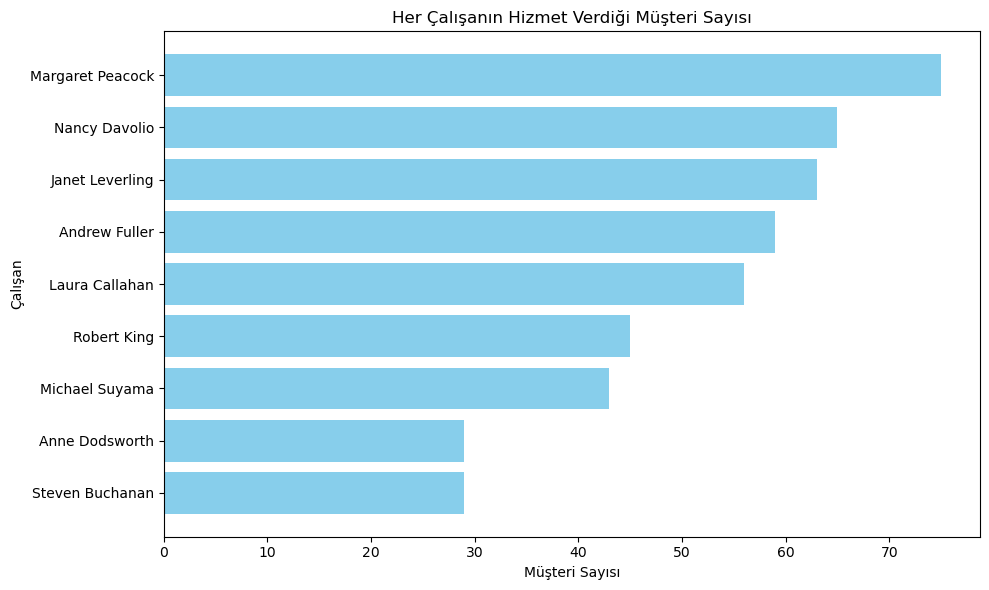

In [6]:
plt.figure(figsize=(10, 6))
plt.barh(df['first_name'] + ' ' + df['last_name'], df['unique_customers'], color='skyblue')
plt.xlabel('Müşteri Sayısı')
plt.ylabel('Çalışan')
plt.title('Her Çalışanın Hizmet Verdiği Müşteri Sayısı')
plt.gca().invert_yaxis()  # Y eksenini ters çevir
plt.tight_layout()
plt.show()

In [7]:
## iki tabloda incelendiğinde çalışanlarımız satış miktarları ile ilgilendikleri müşteri sayıları arasında doğrusal bir bağlantı var diyebiliriz.